# Fingerprints and SMILES
In this notebook, we explore various ways to represent molecules using traditional cheminformatics representatations, including SMILES strings, Morgan fingerprints, and MACCS keys. 

We will use the popular [RDKit](https://www.rdkit.org/) library for working with molecular data, the a sample from the ZINC-250k dataset, provided in [./data/zinc-250k-sample.csv](./data/zinc-250k-sample.csv)

To run this notebook, you will need to use a kernel with the following libraries installed:
* RDKit
* Pandas
* ipykernel

## Building the environment
You can create a new environment for this notebook using Conda. You can do this in the terminal via the following sequence of commands:
```
conda create -n nb1-env python=3.9
conda activate nb1-env
pip install pandas ipykernel rdkit-pypi
```

Then update the Python kernel you are using to run this notebook. Go to `Kernel` > `Change kernel` > `Python (nb1-env)`. You may need to restart the kernel if you do not see your new environment.

## Loading the data

In [6]:
import pandas as pd

# Load the CSV file for the ZINC-250k subset
file_path = '../data/zinc-250k-sample.csv'
df = pd.read_csv(file_path)

# Extract each property into a different variable
smiles = df['smiles'].tolist()
logP = df['logP'].tolist()
qed = df['qed'].tolist()
SAS = df['SAS'].tolist()

# Print the extracted variables
print("SMILES:", smiles)
print("logP:", logP)
print("qed:", qed)
print("SAS:", SAS)

SMILES: ['CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1', 'C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1', 'N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)cc2)cc1', 'CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c2CCCCC3)C1', 'N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#N)C12CCCCC2', 'CC[NH+](CC)[C@](C)(CC)[C@H](O)c1cscc1Br', 'COc1ccc(C(=O)N(C)[C@@H](C)C/C(N)=N/O)cc1O', 'O=C(Nc1nc[nH]n1)c1cccnc1Nc1cccc(F)c1', 'Cc1c(/C=N/c2cc(Br)ccn2)c(O)n2c(nc3ccccc32)c1C#N', 'C[C@@H]1CN(C(=O)c2cc(Br)cn2C)CC[C@H]1[NH3+]', 'CCOc1ccc(OCC)c([C@H]2C(C#N)=C(N)N(c3ccccc3C(F)(F)F)C3=C2C(=O)CCC3)c1', 'Cc1ccc2nc(S[C@H](C)C(=O)NC3CCC(C)CC3)n(C)c(=O)c2c1', 'O=C(N1CCc2c(F)ccc(F)c2C1)C1(O)Cc2ccccc2C1', 'Cc1ccccc1C(=O)N1CCC2(CC1)C[C@H](c1ccccc1)C(=O)N2C', 'CCCc1cc(NC(=O)CN2C(=O)NC3(CCC(C)CC3)C2=O)n(C)n1', 'CC(C)Cc1nc(SCC(=O)NC[C@@H]2CCCO2)c2c(=O)n(C)c(=O)n(C)c2n1', 'Cc1ccc(CNC(=O)c2ccccc2NC(=O)[C@@H]2CC(=O)N(c3ccc(C)cc3)C2)cc1', 'CCCCC(=O)NC(=S)Nc1ccccc1C(=O)N1CCOCC1', 'Cc1c(NC(=O)CSc2nc3sc4c(c3c(=O)[nH]2)CCCC4)c(=O)n(-c2c

## Visualizing molecules and their SMILES
Let's see what some of these molecules look like by visualizing a few of them using RDKit to draw their 2D skeletal representations. We can include the SMILES underneath each image as a label:

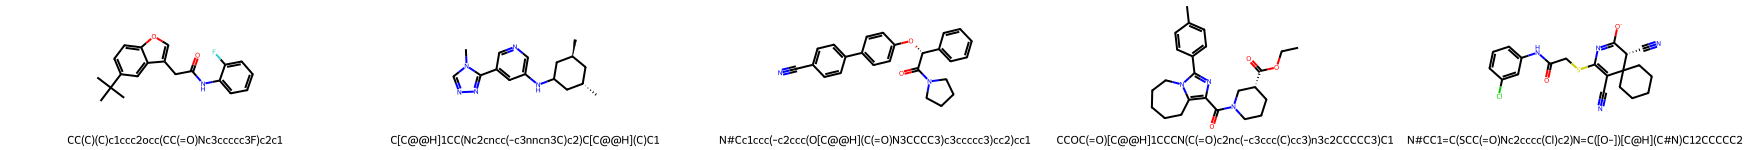

In [7]:
from rdkit import Chem
from rdkit.Chem import Draw

# Visualize a few molecules using RDKit
# Convert SMILES to RDKit molecule objects
molecules = [Chem.MolFromSmiles(i) for i in smiles[:5]]

# Draw the molecules with SMILES as labels
Draw.MolsToGridImage(molecules, molsPerRow=5, subImgSize=(350, 150), legends=smiles[:5])

## Exploring molecular Fingerprints
### Morgan Fingerprints
Morgan fingerprints and extended-connectivity fingerprints (ECFP) are one of the most common representations used in cheminformatics and ML. In RDKit, these two are identical. Here, we will generate radius 2 Morgan fingerprints for the first molecule using bit lengths of 256, 512, and 1048:

In [8]:
from rdkit.Chem import AllChem

# Convert the first SMILES string to an RDKit molecule object
first_molecule = Chem.MolFromSmiles(smiles[0])

# Generate Morgan fingerprints for the first molecule with different bit lengths
fingerprint_256 = AllChem.GetMorganFingerprintAsBitVect(first_molecule, radius=2, nBits=256)
fingerprint_512 = AllChem.GetMorganFingerprintAsBitVect(first_molecule, radius=2, nBits=512)
fingerprint_1024 = AllChem.GetMorganFingerprintAsBitVect(first_molecule, radius=2, nBits=1024)

# Print the fingerprints
print("Morgan fingerprint (256 bits):", fingerprint_256.ToBitString())
print("Morgan fingerprint (512 bits):", fingerprint_512.ToBitString())
print("Morgan fingerprint (1024 bits):", fingerprint_1024.ToBitString())

Morgan fingerprint (256 bits): 0000000010000000101000001000000001000001010010001000000000010000100001000001010011000000000000100000100000010000001000100000010011000000111001011000010000001000100000000000000100000000000100000000000010000000010000100000100000000000000000000000000000000001
Morgan fingerprint (512 bits): 00000000100000000000000000000000010000000100100000000000000000001000000000000000100000000000000000000000000000000010001000000000110000000010010110000100000000001000000000000001000000000001000000000000100000000100001000001000000000000000000000000000000000010000000000000000101000001000000000000001000000001000000000010000000001000001010001000000000000100000100000010000000000000000010010000000110000000000000000001000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000
Morgan fingerprint (1024 bits): 0000000010000000000000000000000001000000010000000000000000000000100000000000000010000000000000000000000000000000001000100000000010000000

## Structural Keys
In structural keys, a molecule is encoded into a binary bit string where each bit corresponds to a “pre-defined” structural feature (e.g., substructure or fragment). If the molecule has a pre-defined feature, the bit position corresponding to this feature is set to 1. Otherwise, it is 0. It is important to understand that structural keys cannot encode structural features that are not pre-defined in the fragment library. In this example we will work with MACCS keys. 

The MACCS (Molecular ACCess System) keys are one of the most commonly used structural keys. While there are two sets of MACCS keys (one with 960 keys and the other containing a subset of 166 keys), only the shorter fragment definitions are available to the public. These 166 public keys are implemented in popular open-source cheminformatics software packages, including RDKit.

Let's generate and visualize the MACCS keys using RDKit for the five molecules visualized above:

In [10]:
from rdkit.Chem import MACCSkeys

# Generate MACCS keys for the first 5 molecules from the dataset we loaded previously
maccs_keys = [MACCSkeys.GenMACCSKeys(mol) for mol in molecules]

# Print the MACCS keys
for i, keys in enumerate(maccs_keys):
    print(f"MACCS keys for molecule {i+1}:", keys.ToBitString())

MACCS keys for molecule 1: 00000000000000000000000000000000000000000010000000000000010000000010000000100000000100010000100010000100110100111000010000000100000011110100010011000111101110111111110
MACCS keys for molecule 2: 00000000000000000000000000000000000000100000000000001000000000100100000000010101100101000001011010100000100010010001000011101100100001010100011011001111000010101111010
MACCS keys for molecule 3: 00000000000000000000000000000000000000000100000000000000000000100000000010010000000101100000100110001000000000110100011001100111010000000110001101011000111011110111110
MACCS keys for molecule 4: 00000000000000000001000000000000000000100000000000000000000000100100000000010101100101100000100111101100010001110010011011110110110000001110001011111100011111111111110
MACCS keys for molecule 5: 00000000000000000000010000000000000000000100010101100000000000001010000000001010110000011000100001110001110100111000011101000001110011110100001101010011011111110111110


## Tips💡

### Avoiding bit collisions 
When visualizing the above fingerprints, you will notices that most of the fingerprint bits are zero. In the case of Morgan fingerprints, they also tend to become sparser the larger they get.

One the challenges with many topological fingerprints is that they can result in *bit collisions.* A bit collision happens when multiple features of a molecule map to the same bit in the fingerprint, potentially leading to loss of information. Bit collisions can occur in any hashed fingerprint representation, including Morgan fingerprints.

Below, we count the number of bit collisions in the same five molecules we have been considering:

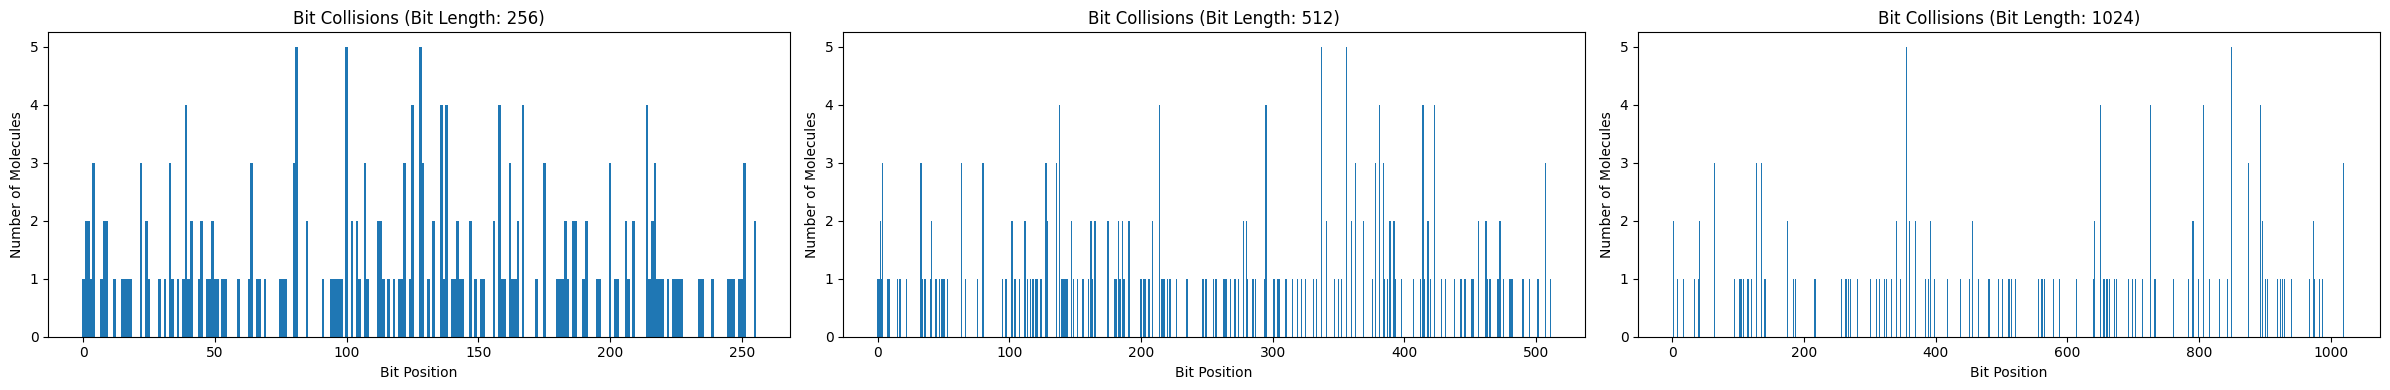

For fingerprints of length 256: 49 non-unique bits, 134 total collisions.
For fingerprints of length 512: 43 non-unique bits, 114 total collisions.
For fingerprints of length 1024: 38 non-unique bits, 103 total collisions.


In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Generate Morgan fingerprints with different bit lengths
bit_lengths = [256, 512, 1024]
fingerprints = {bit_length: [] for bit_length in bit_lengths}

for bit_length in bit_lengths:
    for mol in molecules:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=bit_length)
        fingerprints[bit_length].append(fp)

# Function to count bit collisions
def count_bit_collisions(fingerprints, bit_length):
    bit_counts = np.zeros(bit_length)
    for fp in fingerprints:
        bit_counts += np.array(fp)
    return bit_counts

# Plot bit collisions for different bit lengths
plt.figure(figsize=(24, 4))

for i, bit_length in enumerate(bit_lengths):
    plt.subplot(1, 3, i + 1)
    bit_counts = count_bit_collisions(fingerprints[bit_length], bit_length)
    plt.bar(range(bit_length), bit_counts, width=1.0)
    plt.title(f'Bit Collisions (Bit Length: {bit_length})')
    plt.xlabel('Bit Position')
    plt.ylabel('Number of Molecules')

plt.tight_layout()
plt.show()

for i, bit_length in enumerate(bit_lengths):
    bit_counts = count_bit_collisions(fingerprints[bit_length], bit_length)
    num_collisions = int(sum([1 for i in bit_counts if i > 1]))
    total_collisions = int(sum([i for i in bit_counts if i > 1]))
    print(f'For fingerprints of length {bit_length}: {num_collisions} non-unique bits, {total_collisions} total collisions.')

You should observe that the number of clashing bits is greater for smaller fingerprints than for larger fingerprints, as there are less bins in which to allocate the different structural components observed in the molecules.

In the cell above, go back and test what happens if you increase the radius of the fingerprint. Do you expect more or less collisions? What happens if you make the fingerprints even larger?

### Evaluating molecular similarity
Fingerprints are a great way for computing molecular similarity, if what is relevant is the similarity between the underlying 2D graphs. Nonetheless, it is not a great substitute for comparing the 3D similarity of specific conformers.

Below are some examples for how to compute the Tanimoto similarity between the molecules in the dataset. First, let's draw the first three molecules again to remember their 2D structure and SMILES, and let's throw in another molecule, which is essentially the first molecule but with an additional carbon atom:

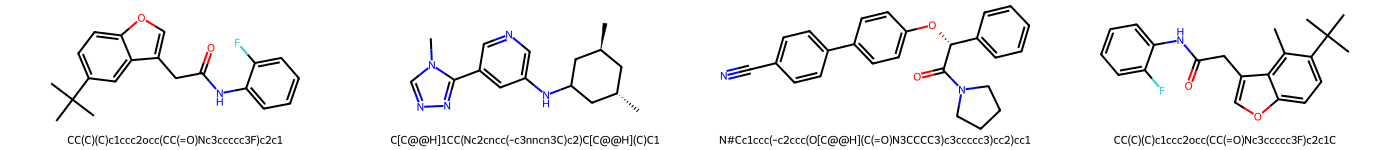

In [56]:
almost_identical_smiles = smiles[0] + 'C'  # Added a 'C' at the end
almost_identical_mol = Chem.MolFromSmiles(almost_identical_smiles)
molecules_updated = molecules[:3] + [almost_identical_mol]
smiles_updated = smiles[:3] + [almost_identical_smiles]

# Draw the molecules again, with SMILES as labels
Draw.MolsToGridImage(molecules_updated, molsPerRow=4, subImgSize=(350, 150), legends=smiles_updated)

In [62]:
from rdkit.DataStructs import TanimotoSimilarity

# Define the Morgan fingerprint parameters
radius = 2
nbits = 256

# Generate Morgan fingerprints for three molecules
fp1 = AllChem.GetMorganFingerprintAsBitVect(molecules_updated[0], radius=radius, nBits=nbits)
fp2 = AllChem.GetMorganFingerprintAsBitVect(molecules_updated[1], radius=radius, nBits=nbits)
fp3 = AllChem.GetMorganFingerprintAsBitVect(molecules_updated[2], radius=radius, nBits=nbits)
fp4 = AllChem.GetMorganFingerprintAsBitVect(molecules_updated[3], radius=radius, nBits=nbits)

# Compute the Tanimoto similarity between the fingerprints
similarity12 = TanimotoSimilarity(fp1, fp2)
similarity13 = TanimotoSimilarity(fp1, fp3)
similarity14 = TanimotoSimilarity(fp1, fp4)
similarity11 = TanimotoSimilarity(fp1, fp1)
similarities = [similarity12, similarity13, similarity14, similarity11]
print(f'The Tanimoto similarity between the first and second molecule is: {similarity12}')
print(f'The Tanimoto similarity between the first and third molecule is: {similarity13}')
print(f'The Tanimoto similarity between the first and fourth molecule is: {similarity14}')
print(f'The Tanimoto similarity between the first molecule and itself is: {similarity11}')

The Tanimoto similarity between the first and second molecule is: 0.12857142857142856
The Tanimoto similarity between the first and third molecule is: 0.19696969696969696
The Tanimoto similarity between the first and fourth molecule is: 0.6078431372549019
The Tanimoto similarity between the first molecule and itself is: 1.0


So we see that the first molecule is more similar to the third than the second, and that it is *a lot* more similar to the molecule we created by simply adding a carbon atom to the first molecule. Finally, we see that a Tanimoto similarity of 1 is only attained by two identical Morgan fingerprints.

You will also notice that, even though we only added a single carbon atom, the Tanimoto similarity between the first and fourth molecule's fingerprints dropped significantly (from 1.0 to ~0.6 if using a radius of 2 and bit length of 256).

You can try playing around with the Morgan fingerprint parameters to see how the fingerprint similarity changes - for instance, verify that the Tanimoto similarity increases when the fingerprints have more bit collisions (i.e., shorter fingerprints, and/or larger radius). It should become clear that Tanimoto similarities between Morgan fingerprints generated with different parameters cannot be compared.

Instead of comparing the Tanimoto similarity of the Morgan fingerprints, we can try comparing the edit distance of the SMILES:

In [64]:
def levenshtein_distance(smiles1, smiles2):
    """
    Compute the Levenshtein distance between two SMILES strings.

    Parameters:
    smiles1 (str): The first SMILES string.
    smiles2 (str): The second SMILES string.

    Returns:
    int: The Levenshtein distance between the two SMILES strings.
    """
    len1, len2 = len(smiles1), len(smiles2)
    dp = [[0 for _ in range(len2 + 1)] for _ in range(len1 + 1)]

    for i in range(len1 + 1):
        dp[i][0] = i
    for j in range(len2 + 1):
        dp[0][j] = j

    for i in range(1, len1 + 1):
        for j in range(1, len2 + 1):
            if smiles1[i - 1] == smiles2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                dp[i][j] = min(dp[i - 1][j] + 1,     # Deletion
                               dp[i][j - 1] + 1,     # Insertion
                               dp[i - 1][j - 1] + 1) # Substitution

    return dp[len1][len2]

# Compute the edit distance between the SMILES
distance12 = levenshtein_distance(smiles_updated[0], smiles_updated[1])
distance13 = levenshtein_distance(smiles_updated[0], smiles_updated[2])
distance14 = levenshtein_distance(smiles_updated[0], smiles_updated[3])
distance11 = levenshtein_distance(smiles_updated[0], smiles_updated[0])
distances= [distance12, distance13, distance14, distance11]
print(f'The edit distance between the first and second molecule is: {distance12}')
print(f'The edit distance between the first and third molecule is: {distance13}')
print(f'The edit distance between the first and fourth molecule is: {distance14}')
print(f'The edit distance between the first molecule and itself is: {distance11}')

The edit distance between the first and second molecule is: 34
The edit distance between the first and third molecule is: 29
The edit distance between the first and fourth molecule is: 1
The edit distance between the first molecule and itself is: 0


As can be seen, a lower Tanimoto similarity generally correlates with a greater edit distance, but the relationship is not linear. There are many other widely-used similarity metrics, such as cosine similarity, Euclidean distance, Manhattan distance, etc.

To draw meaningful conclusions from molecular data, it is important to reflect on whether the chosen metrics accurately reflect the properties you are trying to assess, not least when selecting a similarity metric.